In [17]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [57]:
#setting initial conditions as asked in the assignement
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5./(n-1)

T = 8000

dt = .5 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [108]:

def ftcs(u, v, nt, Du, Dv, F, k, dt, dh):

    #force j_mid and i_mid to be integers so we can use them as indices
    #for the array T
    ut=numpy.zeros((nt, n, n))
    for n in range(nt):
        un = u.copy()
        vn= v.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(Du/dh/dh * (un[2:,1:-1] - 4*un[1:-1,1:-1] + un[:-2,1:-1] + un[1:-1,2:] + un[1:-1,:-2]) - un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1] + F*(1-un[1:-1,1:-1])) #nonlinear + feed/kill part
        v[1:-1,1:-1] = vn[1:-1,1:-1] + dt*(Dv/dh/dh * (vn[2:,1:-1] - 4*vn[1:-1,1:-1] + vn[:-2,1:-1] + vn[1:-1,2:] + vn[1:-1,:-2]) + un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1] - (F+k)*vn[1:-1,1:-1]) #nonlinear + feed/kill part
  
        # Enforce Neumann BCs
        u[1,:] = u[2,:]
        u[:,1] = u[:, 2]
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:,-2]
        v[1,:] = v[2,:]
        v[:,1] = v[:, 2]
        v[-1,:] = v[-2,:]
        v[:,-1] = v[:,-2]
        ut[n,:,:]=u
        
        
    return u

In [125]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

In [126]:
ftcs(U, V, 50, Du, Dv, F, k, dt, dh)

0

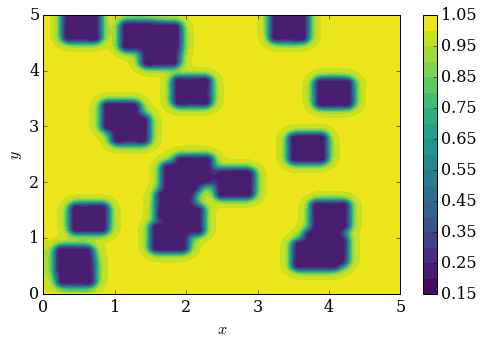

In [127]:
x = numpy.linspace(0,5.,n)
y = numpy.linspace(0,5.,n)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,U,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();


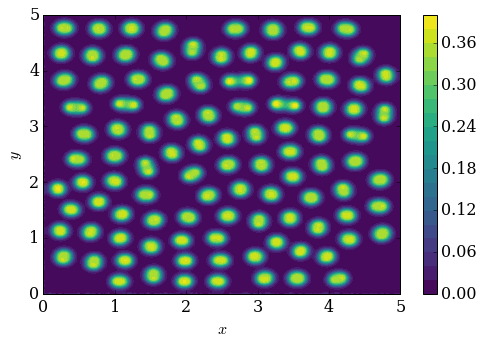

In [124]:
x = numpy.linspace(0,5.,n)
y = numpy.linspace(0,5.,n)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,V,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();